In [1]:
import numpy as np
import pandas as pd
from time import time
from pcy import PCY
from helper import GetItemsetFromFile, PrintTimeInfo, SaveDataFrameToHTMLFile, SaveDataFrameToHTMLFile, CreateTripleDataFrame, GetSubsectionOfData, CreatePairDataFrame, CreatePLPlot

In [2]:
# Get Retail Data

In [3]:
s_t = time()
retail_data = GetItemsetFromFile("retail.data")
f_t = time()
print("Time taken to read retail data: %.2f seconds" % (f_t - s_t))

Time taken to read retail data: 0.22 seconds


In [4]:
support_values = [0.01, 0.02, 0.05]
split_data_values = [0.2, 0.4, 1]

In [5]:
pcy_pair_timings = []
# Perfom PCY on pairs of data for all support values and split data values
for data_split in split_data_values:
    for support in support_values:
        data = GetSubsectionOfData(retail_data, data_split) # Get % of data
        file_name = "pcy-ret-p-"+str(round(data_split*100))+"-" + str(round(support*100))   # Set file name

        s_t = time()    # Start Time
        occ, freq = PCY(data, support, 2)
        f_t = time()    # End Time
        pcy_pair_timings.append((f_t - s_t))
        PrintTimeInfo("PCY", (data_split * 100), (f_t - s_t), support, "pairs")
        df = CreatePairDataFrame(occ, freq, len(data))
        SaveDataFrameToHTMLFile(df, file_name)
    print("Done running PCY pairs on %d%% of data" % (data_split * 100)+"\n")

Time taken to complete PCY on 20% of data using pairs of retail data: 4.65 seconds with support: 1%
Time taken to complete PCY on 20% of data using pairs of retail data: 3.55 seconds with support: 2%
Time taken to complete PCY on 20% of data using pairs of retail data: 2.66 seconds with support: 5%
Done running PCY pairs on 20% of data

Time taken to complete PCY on 40% of data using pairs of retail data: 9.97 seconds with support: 1%
Time taken to complete PCY on 40% of data using pairs of retail data: 5.92 seconds with support: 2%
Time taken to complete PCY on 40% of data using pairs of retail data: 4.99 seconds with support: 5%
Done running PCY pairs on 40% of data

Time taken to complete PCY on 100% of data using pairs of retail data: 22.78 seconds with support: 1%
Time taken to complete PCY on 100% of data using pairs of retail data: 15.57 seconds with support: 2%
Time taken to complete PCY on 100% of data using pairs of retail data: 13.50 seconds with support: 5%
Done running PCY

In [6]:
pcy_triple_timings = []
# Perfom PCY on triples of data for all support values and split data values
for data_split in split_data_values:
    for support in support_values:
        data = GetSubsectionOfData(retail_data, data_split) # Get % of data
        file_name = "pcy-ret-t-"+str(round(data_split*100))+"-" + str(round(support*100))   # Set file name

        s_t = time()    # Start Time
        freq = PCY(data, support, 3)
        f_t = time()    # End Time
        pcy_triple_timings.append((f_t - s_t))
        PrintTimeInfo("PCY", (data_split * 100), (f_t - s_t), support, "triples")
        df = CreateTripleDataFrame(freq)
        SaveDataFrameToHTMLFile(df, file_name)
    print("Done running PCY triples on %d%% of data" % (data_split * 100)+"\n")

Time taken to complete PCY on 20% of data using triples of retail data: 4.26 seconds with support: 1%
Time taken to complete PCY on 20% of data using triples of retail data: 3.02 seconds with support: 2%
Time taken to complete PCY on 20% of data using triples of retail data: 2.48 seconds with support: 5%
Done running PCY triples on 20% of data

Time taken to complete PCY on 40% of data using triples of retail data: 8.72 seconds with support: 1%
Time taken to complete PCY on 40% of data using triples of retail data: 6.13 seconds with support: 2%
Time taken to complete PCY on 40% of data using triples of retail data: 5.20 seconds with support: 5%
Done running PCY triples on 40% of data

Time taken to complete PCY on 100% of data using triples of retail data: 22.06 seconds with support: 1%
Time taken to complete PCY on 100% of data using triples of retail data: 16.09 seconds with support: 2%
Time taken to complete PCY on 100% of data using triples of retail data: 14.54 seconds with suppor

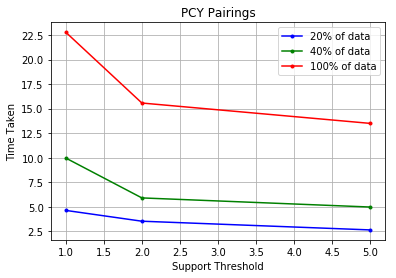

In [7]:
CreatePLPlot(pcy_pair_timings, support_values, "PCY Pairings")

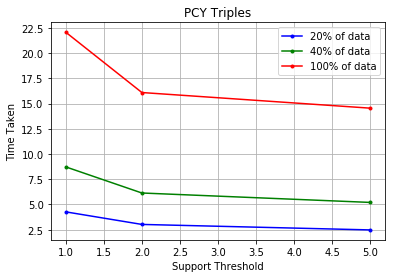

In [8]:
CreatePLPlot(pcy_triple_timings, support_values, "PCY Triples")